#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset= pd.read_csv('Credit_Card_Applications.csv')
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
X= sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som= MiniSom(x=10, y=10, input_len=15)
som.random_weights_init(X)
som.train_random(data= X, num_iteration=100)

##Visualizing the results


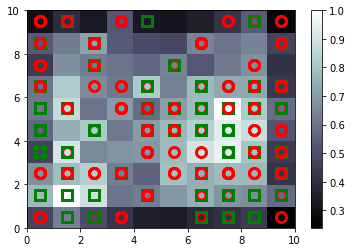

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers= ['o', 's']
colors= ['r', 'g']
for i,x in enumerate(X):
  w= som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor= colors[y[i]],
       markerfacecolor= 'None',
       markersize= 10,
       markeredgewidth=3
  )
show()

## Finding the frauds


In [7]:
mapping= som.win_map(X)
frauds= np.concatenate((mapping[(7,4)], mapping[(7,3)], mapping[(7,5)]), axis=0)
frauds= sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [8]:
print('Customer ID')
for f in frauds[:,0]:
  print(int(f))

Customer ID
15775750
15690372
15775235
15780088
15768474
15762045
15750476
15799859
15789014
15571121
15642391
15657778
15652658
15635244
15624595
15688264
15581700
15700511
15629133
15604963
15699963
15667588


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [9]:
customers= dataset.iloc[:,1:].values

## Create Dependent Variable

In [10]:
is_fraud= np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i]= 1

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
customers= ss.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [12]:
import tensorflow as tf

## Initializing the ANN

In [13]:
ann= tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [14]:
ann.add( tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [15]:
ann.add( tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [16]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

## Training the ANN on the Training set

In [17]:
ann.fit(customers, is_fraud, batch_size=1, epochs=3)

Epoch 1/3
690/690 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.9681
Epoch 2/3
690/690 [==============================] - 1s 1ms/step - loss: 0.2174 - accuracy: 0.9681
Epoch 3/3
690/690 [==============================] - 1s 1ms/step - loss: 0.1604 - accuracy: 0.9681


## Predicting test set results

In [22]:
y_pred= ann.predict(customers)
y_pred= np.concatenate((dataset.iloc[:, 0:1].values , y_pred.reshape(len(y_pred),1)), 1)
y_pred= y_pred[y_pred[:,1].argsort()]

In [23]:
print(y_pred)

[[1.57901130e+07 1.05289999e-07]
 [1.56058720e+07 5.76323837e-05]
 [1.57067620e+07 1.38103962e-04]
 ...
 [1.57845260e+07 3.12784523e-01]
 [1.56845120e+07 3.12784523e-01]
 [1.56316850e+07 3.12784523e-01]]


In [20]:
print(dataset.iloc[:, 0:1].values)

[[15776156]
 [15739548]
 [15662854]
 [15687688]
 [15715750]
 [15571121]
 [15726466]
 [15660390]
 [15663942]
 [15638610]
 [15644446]
 [15585892]
 [15609356]
 [15803378]
 [15599440]
 [15692408]
 [15683168]
 [15790254]
 [15767729]
 [15768600]
 [15699839]
 [15786237]
 [15694530]
 [15796813]
 [15605791]
 [15714087]
 [15711446]
 [15588123]
 [15748552]
 [15618410]
 [15672432]
 [15610042]
 [15580914]
 [15583680]
 [15813718]
 [15767264]
 [15686461]
 [15678882]
 [15789611]
 [15668679]
 [15631685]
 [15655658]
 [15753591]
 [15617348]
 [15704581]
 [15738487]
 [15648069]
 [15737627]
 [15731586]
 [15757467]
 [15597709]
 [15720529]
 [15596797]
 [15681755]
 [15815271]
 [15682860]
 [15621546]
 [15705918]
 [15684512]
 [15671769]
 [15642934]
 [15594305]
 [15789201]
 [15706762]
 [15766183]
 [15777994]
 [15568162]
 [15680643]
 [15761854]
 [15730793]
 [15692137]
 [15608595]
 [15709459]
 [15775750]
 [15585855]
 [15752139]
 [15768295]
 [15766906]
 [15725776]
 [15682576]
 [15704081]
 [15719940]
 [15672894]
 [15